Train shape: (60000, 784)
Test shape: (10000, 784)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-27 15:27:02.981805: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7396 - loss: 0.8245 - val_accuracy: 0.9608 - val_loss: 0.1437
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9322 - loss: 0.2267 - val_accuracy: 0.9708 - val_loss: 0.1028
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9502 - loss: 0.1718 - val_accuracy: 0.9745 - val_loss: 0.0903
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9601 - loss: 0.1334 - val_accuracy: 0.9763 - val_loss: 0.0822
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9658 - loss: 0.1127 - val_accuracy: 0.9770 - val_loss: 0.0773
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9695 - loss: 0.0975 - val_accuracy: 0.9783 - val_loss: 0.0707
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9746 - loss: 0.0876 - val_accuracy: 0.9788 - val_loss: 0.0707
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9749 - loss: 0.0812 - val_accuracy: 0.

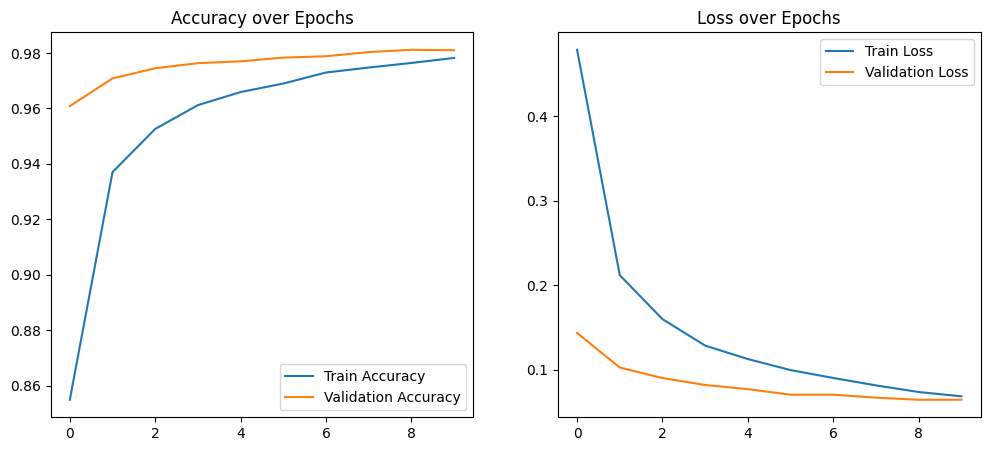

In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")
test = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv")

# Split into features and labels
X_train = train.iloc[:, 1:].values / 255.0
y_train = train.iloc[:, 0].values

X_test = test.iloc[:, 1:].values / 255.0
y_test = test.iloc[:, 0].values

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# =====================
# Build Neural Network
# =====================
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train, y_train,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=128,
                    verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("\nTest Accuracy:", test_acc)

# Plot training history
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss over Epochs")
plt.legend()

plt.show()
